<a href="https://colab.research.google.com/github/JeriesKawaneh/Prediction-of-Product-Sales/blob/main/Sales_Prediction_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Data

In [31]:
#import packages
import numpy as pd
import pandas as pd
#importing matplot & seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')
#import and reading the file
df_sp=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df_sp.info()
df_sp.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Data Cleaning

In [32]:
#check for objects data types
df_sp.select_dtypes('object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [33]:
#check for number data types
df_sp.select_dtypes('number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


(array([ 2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0'),
  Text(22.5, 0, '22.5')])

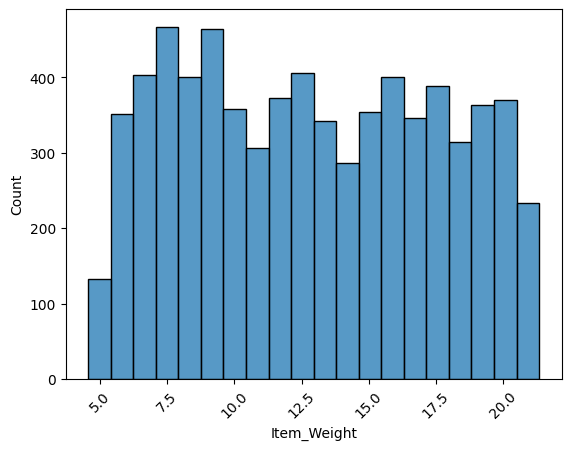

In [34]:
#Item wights counts
ax_hist_num=sns.histplot(data=df_sp,x= 'Item_Weight')
plt.xticks(rotation=45)

* This plot shows items weight count which can help us identify what type of outlits that have more of each type


In [35]:
#converting number type to str in Outlet_Establishment_Year, it does not included in necessary calculations
df_sp['Outlet_Establishment_Year']=df_sp['Outlet_Establishment_Year'].astype(str)

In [36]:
#checking conversion
df_sp['Outlet_Establishment_Year'].dtypes

dtype('O')

In [37]:
#checking for duplicates
duplicates = df_sp.duplicated(keep=False)
duplicates.sum()

np.int64(0)

In [38]:
#Cecking for missing values
missing_values= df_sp.isna().sum()
missing_values


,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [39]:
#Cecking for percantage of the missing values
miss_p= missing_values/len(df_sp)*100
miss_p

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [40]:
#Filling missing values for Item_wight
# since the min value and max are not extreem using mean is useful
df_sp['Item_Weight']=df_sp.groupby('Item_Type')['Item_Weight'].transform(
lambda x: x.fillna(x.mean()))

df_sp['Item_Weight'].isna().sum()


np.int64(0)

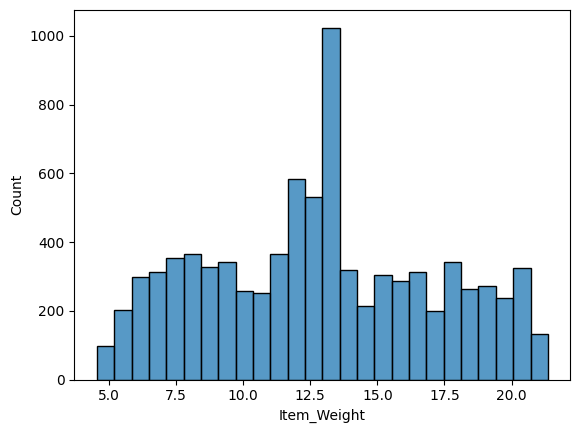

In [41]:
#Item wights counts after filling the null values
ax_hist_num=sns.histplot(data=df_sp,x= 'Item_Weight')

* This plot same as the previous but after filling null values, change is obvious


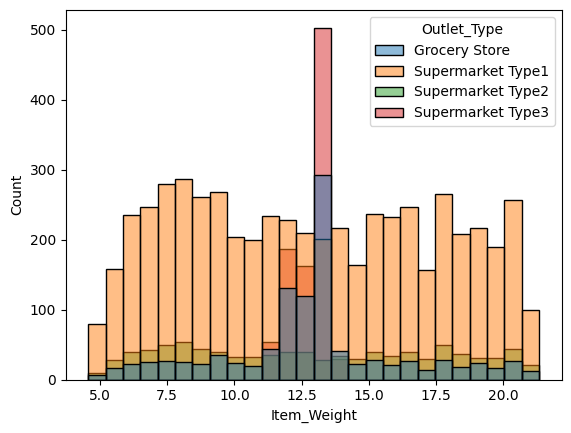

In [56]:
ax_hist_num=sns.histplot(data=df_sp,x= 'Item_Weight', hue='Outlet_Type')

* Here we can exactly see the which type of outlits that have a high weight products

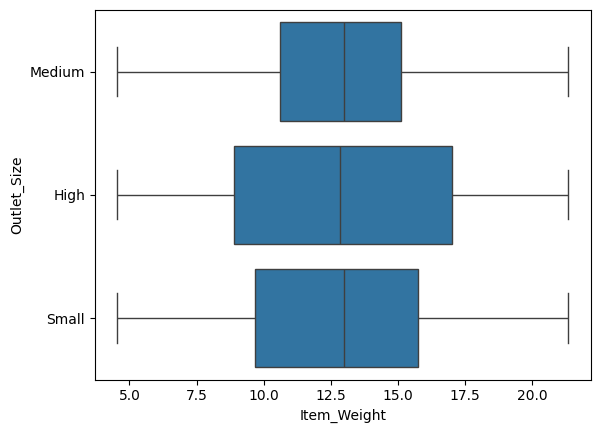

In [42]:
#Item wights counts
ax_countplot=sns.boxplot(data=df_sp,x= 'Item_Weight',y='Outlet_Size')

* In This box plot we can observe that the bigger the size of the outlet the more items weight it can have, in the other hand all of them have outliers which means all of them have all the types but not the same amount.

In [43]:
#making sure there are no null vales in Item_Weight
df_sp["Item_Weight"].isna().sum()

np.int64(0)

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

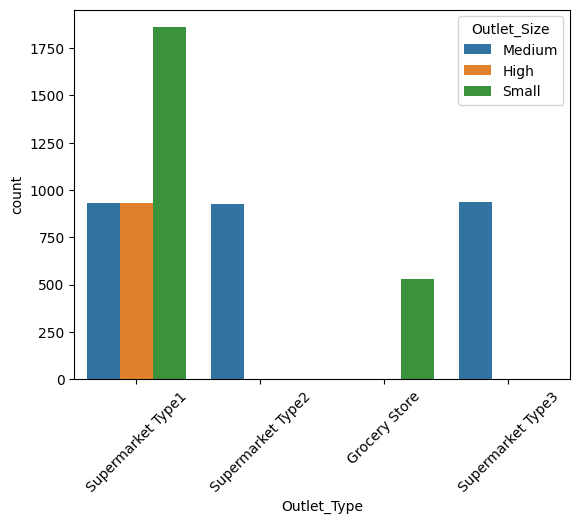

In [44]:
ax_countplot=sns.countplot(data=df_sp, x='Outlet_Type', hue='Outlet_Size',)
plt.xticks(rotation=45)

In [45]:
#Filling missing values for Outlet_Size
df_sp['Outlet_Size']=df_sp['Outlet_Size'].fillna('Unknown')

In [46]:
#making sure the are no null vales in Outlet_Size
df_sp["Outlet_Size"].isna().sum()

np.int64(0)

In [47]:
#checking again for null values existance
missing_values= df_sp.isna().sum()
missing_values


,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


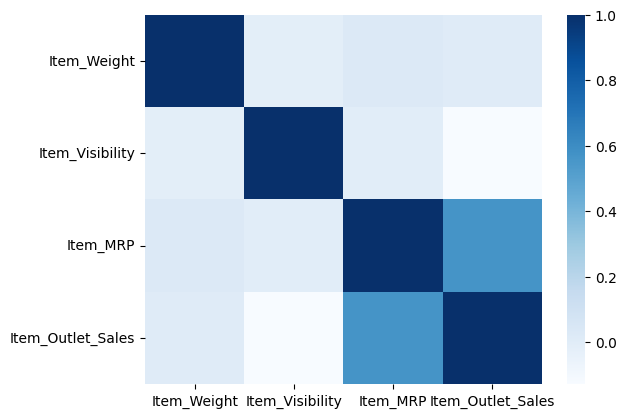

In [48]:

corr= df_sp.corr(numeric_only=True)
ax_heatmap= sns.heatmap(corr, cmap='Blues')

* In this heatmap it shows clearly the highiest correlation is between Item_MRP and Item Outlet Sales which means they have a relation that can help us understand more information.

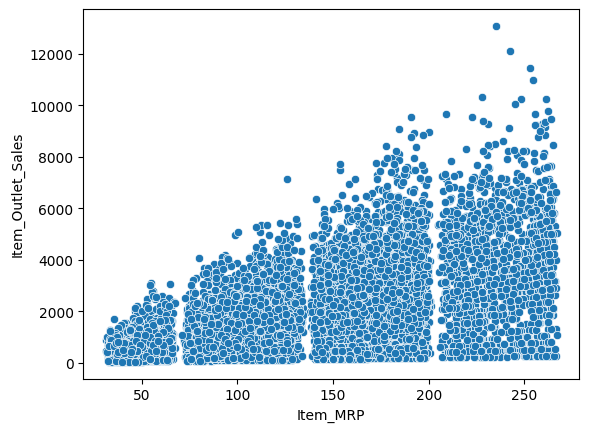

In [49]:
ax_scatter=sns.scatterplot(data=df_sp,x='Item_MRP', y='Item_Outlet_Sales')

As shown in the plot the corr. is positive and as long as the Item MRP raises the Item Outlet Sales raises up too  

In [50]:
#checking inconsistancy
str_cols= df_sp.select_dtypes(include=('object')).columns
for cols in str_cols:
   print(df_sp[cols].value_counts())
   print('\n')

Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: cou

In [51]:
#observing inconsistancy in Item_Fat_Content
df_sp['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [52]:
#making consistancy in Item_Fat_Content
con_dic = {
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
}
df_sp['Item_Fat_Content']=df_sp['Item_Fat_Content'].replace(con_dic)


In [53]:
#checking the changes in consisatncy Item_Fat_Content
df_sp['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [54]:
#sorting the Data Frame by Item Id
df_sp=df_sp.set_index('Item_Identifier')
df_sp=df_sp.sort_values('Item_Identifier')
df_sp

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
DRA12,11.600000,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Unknown,Tier 3,Grocery Store,283.6308
DRA12,11.600000,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Unknown,Tier 2,Supermarket Type1,2552.6772
DRA12,11.600000,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
DRA12,11.600000,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Unknown,Tier 2,Supermarket Type1,3829.0158
DRA12,11.600000,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...
NCZ54,14.650000,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
NCZ54,14.650000,Low Fat,0.000000,Household,161.5552,OUT010,1998,Unknown,Tier 3,Grocery Store,324.9104
NCZ54,13.384736,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768


In [55]:
#Identifying min max mean
df_sp_num=df_sp.select_dtypes('number')

final_data ={ 'Mean':df_sp_num.mean(),
              'Max':df_sp_num.max(),
              'Min':df_sp_num.min()}
df_final_data=pd.DataFrame(final_data)
df_final_data

,Mean,Max,Min
Item_Weight,12.857890,21.350000,4.555
Item_Visibility,0.066132,0.328391,0.000
Item_MRP,140.992782,266.888400,31.290
Item_Outlet_Sales,2181.288914,13086.964800,33.290
